## Modules

In [1]:
import pandas as pd
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load datasets

In [2]:
parkinsons_df = pd.read_csv("../Data/parkinsons.csv").drop(columns=['name'])
heart_df = pd.read_csv("../Data/heart.csv")
diabetes_df = pd.read_csv("../Data/diabetes.csv")

## Displaying first 10 rows of each dataset

In [3]:
print("First 10 rows of Parkinson's dataset:")
print(parkinsons_df.head(10))
print("\nFirst 10 rows of Heart Disease dataset:")
print(heart_df.head(10))
print("\nFirst 10 rows of Diabetes dataset:")
print(diabetes_df.head(10))

First 10 rows of Parkinson's dataset:
   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   
5      120.552       131.162       113.787         0.00968           0.00008   
6      120.267       137.244       114.820         0.00333           0.00003   
7      107.332       113.840       104.315         0.00290           0.00003   
8       95.730       132.068        91.754         0.00551           0.00006   
9       95.056       120.103        91.226         0.00532           0.00006   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.0

## Function to preprocess data

In [4]:

def preprocess_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, scaler
    

## Function to train and evaluate model with hyperparameter tuning

In [5]:

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    best_model = model.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    y_pred = best_model.predict(X_test)
    return best_model, train_acc, test_acc, y_test, y_pred
    

## Train models

In [6]:

parkinsons_X, parkinsons_y, parkinsons_scaler = preprocess_data(parkinsons_df, 'status')
heart_X, heart_y, heart_scaler = preprocess_data(heart_df, 'target')
diabetes_X, diabetes_y, diabetes_scaler = preprocess_data(diabetes_df, 'Outcome')

diabetes_model, diabetes_train_acc, diabetes_test_acc, diabetes_y_test, diabetes_y_pred = train_and_evaluate(diabetes_X, diabetes_y)
parkinsons_model, parkinsons_train_acc, parkinsons_test_acc, parkinsons_y_test, parkinsons_y_pred = train_and_evaluate(parkinsons_X, parkinsons_y)
heart_model, heart_train_acc, heart_test_acc, heart_y_test, heart_y_pred = train_and_evaluate(heart_X, heart_y)


## Save models

In [7]:

with open("../Models/parkinsons_model.pkl", "wb") as f:
    pickle.dump((parkinsons_model, parkinsons_scaler), f)
with open("../Models/heart_model.pkl", "wb") as f:
    pickle.dump((heart_model, heart_scaler), f)
with open("../Models/diabetes_model.pkl", "wb") as f:
    pickle.dump((diabetes_model, diabetes_scaler), f)
    

## Accuracy scores

In [8]:

print("Parkinson's Model - Train Accuracy:", parkinsons_train_acc, "| Test Accuracy:", parkinsons_test_acc)
print("Heart Disease Model - Train Accuracy:", heart_train_acc, "| Test Accuracy:", heart_test_acc)
print("Diabetes Model - Train Accuracy:", diabetes_train_acc, "| Test Accuracy:", diabetes_test_acc)


Parkinson's Model - Train Accuracy: 1.0 | Test Accuracy: 0.9487179487179487
Heart Disease Model - Train Accuracy: 0.9917355371900827 | Test Accuracy: 0.8524590163934426
Diabetes Model - Train Accuracy: 0.9788273615635179 | Test Accuracy: 0.7337662337662337


## Data Visualization

In [9]:
# Visualization: Confusion Matrices
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(list(set(y_test)))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

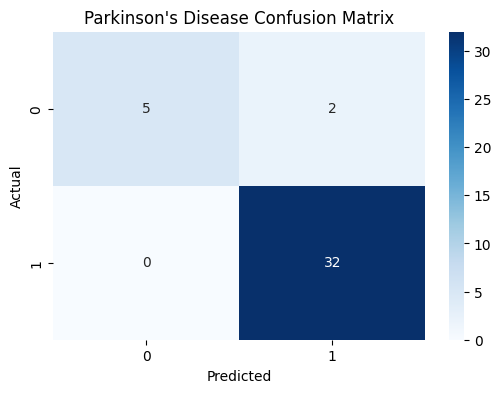

In [10]:
plot_confusion_matrix(parkinsons_y_test, parkinsons_y_pred, "Parkinson's Disease Confusion Matrix")

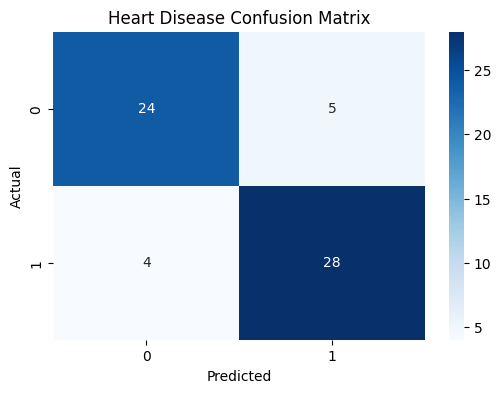

In [11]:
plot_confusion_matrix(heart_y_test, heart_y_pred, "Heart Disease Confusion Matrix")

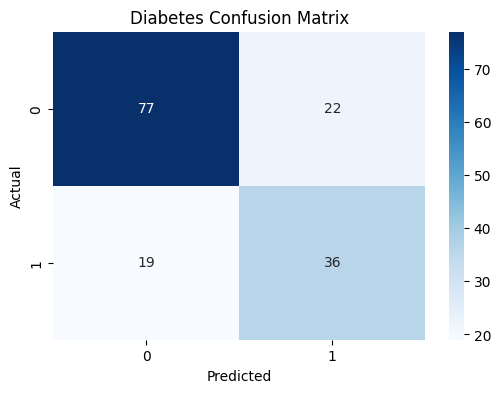

In [12]:
plot_confusion_matrix(diabetes_y_test, diabetes_y_pred, "Diabetes Confusion Matrix")

In [13]:
# Feature Importance Plot
def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title(title)
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5704\71898107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')


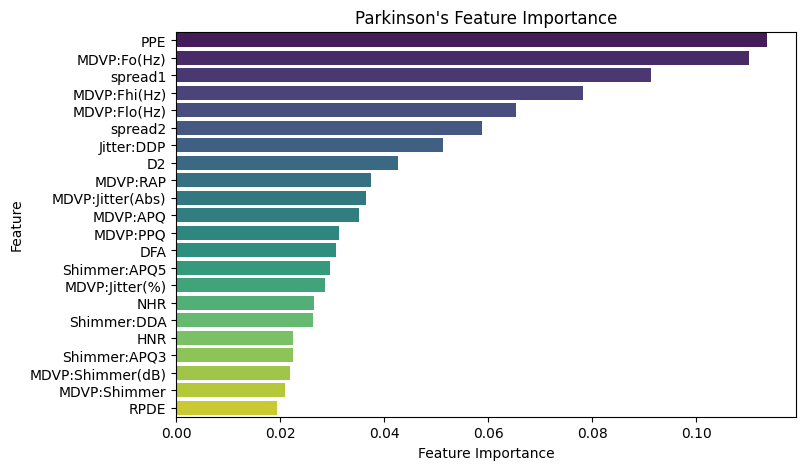

In [14]:
plot_feature_importance(parkinsons_model, parkinsons_df.drop(columns=['status']).columns, "Parkinson's Feature Importance")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5704\71898107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')


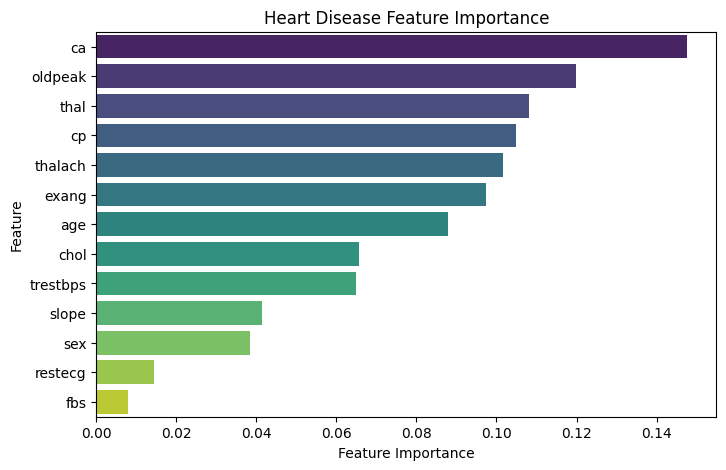

In [15]:
plot_feature_importance(heart_model, heart_df.drop(columns=['target']).columns, "Heart Disease Feature Importance")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5704\71898107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')


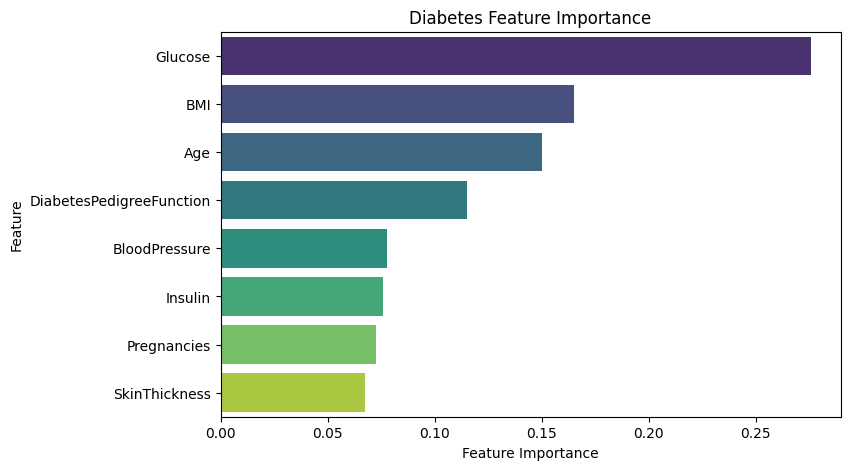

In [16]:
plot_feature_importance(diabetes_model, diabetes_df.drop(columns=['Outcome']).columns, "Diabetes Feature Importance")

In [17]:
# Heatmaps for Feature Correlations
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

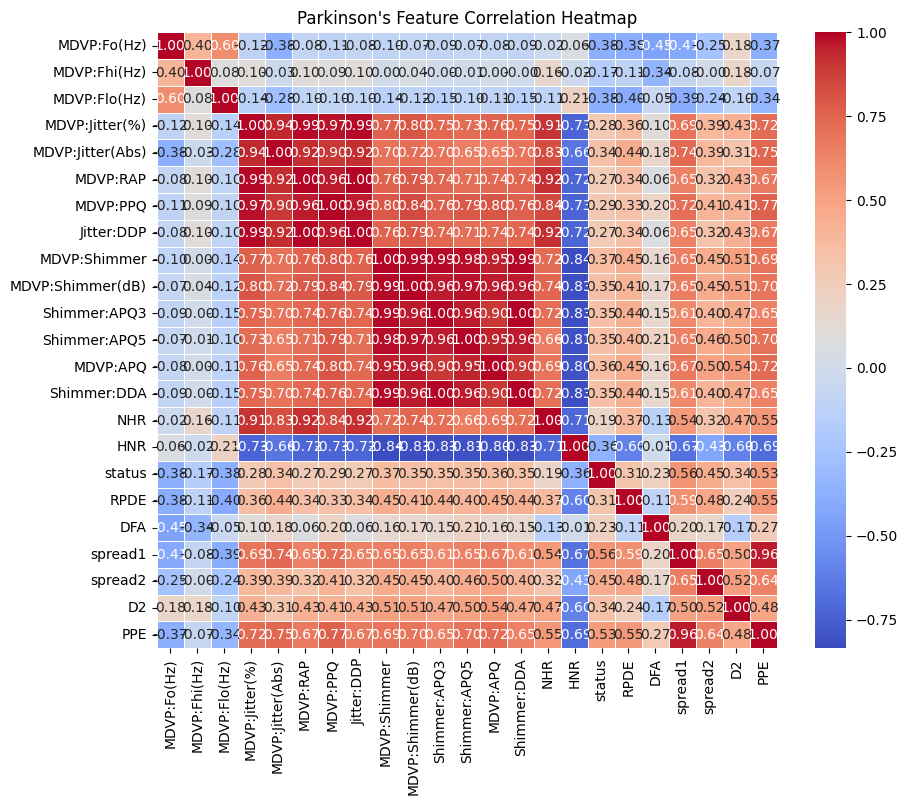

In [18]:
plot_heatmap(parkinsons_df, "Parkinson's Feature Correlation Heatmap")

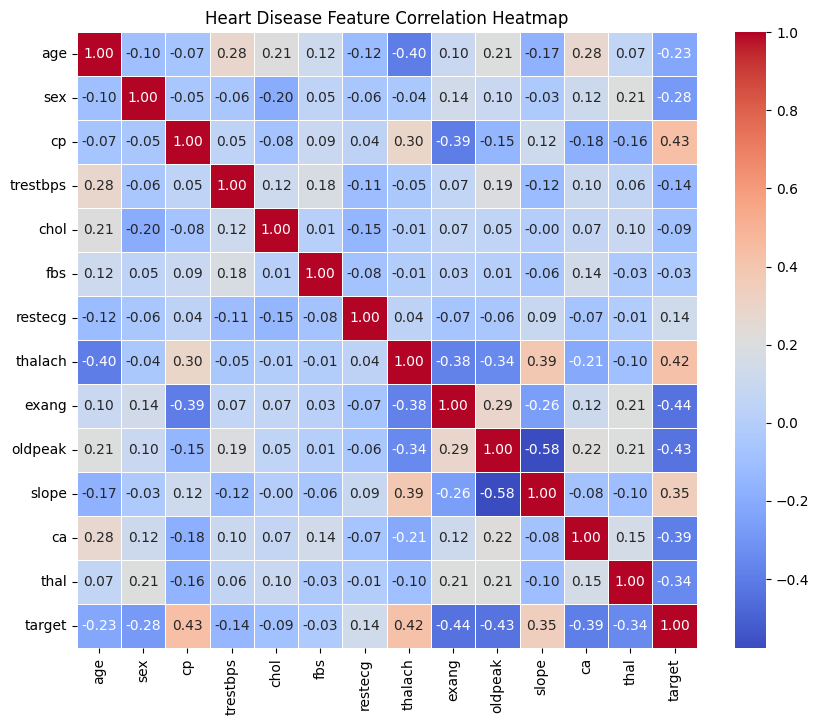

In [19]:
plot_heatmap(heart_df, "Heart Disease Feature Correlation Heatmap")

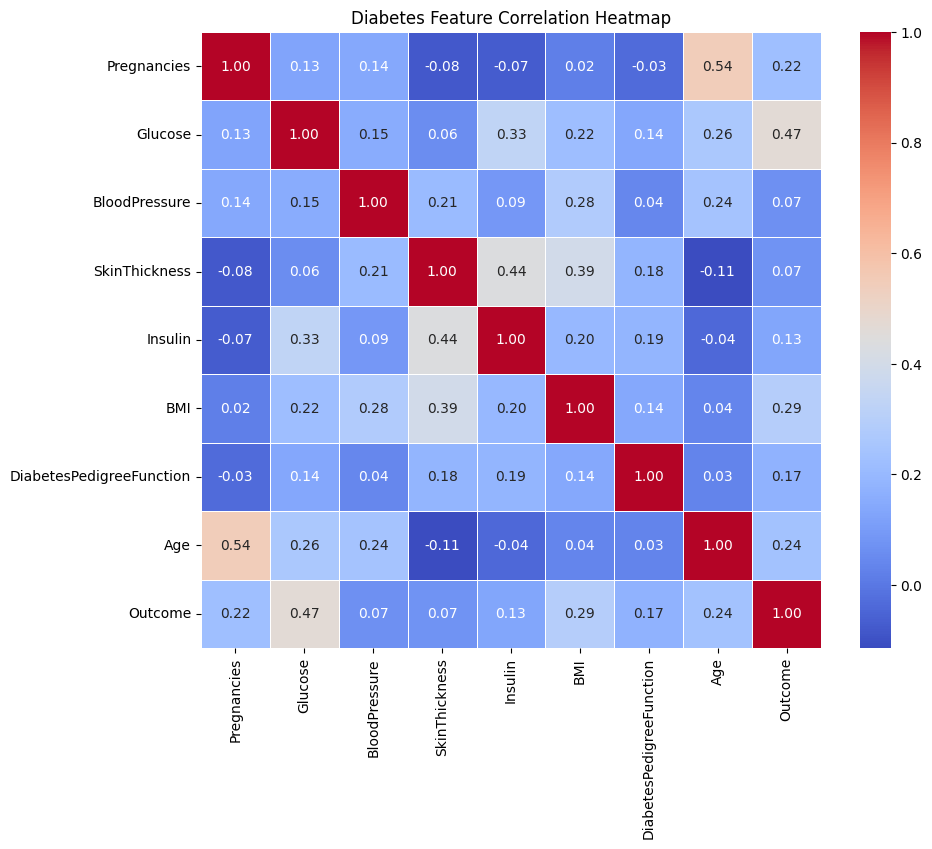

In [20]:
plot_heatmap(diabetes_df, "Diabetes Feature Correlation Heatmap")

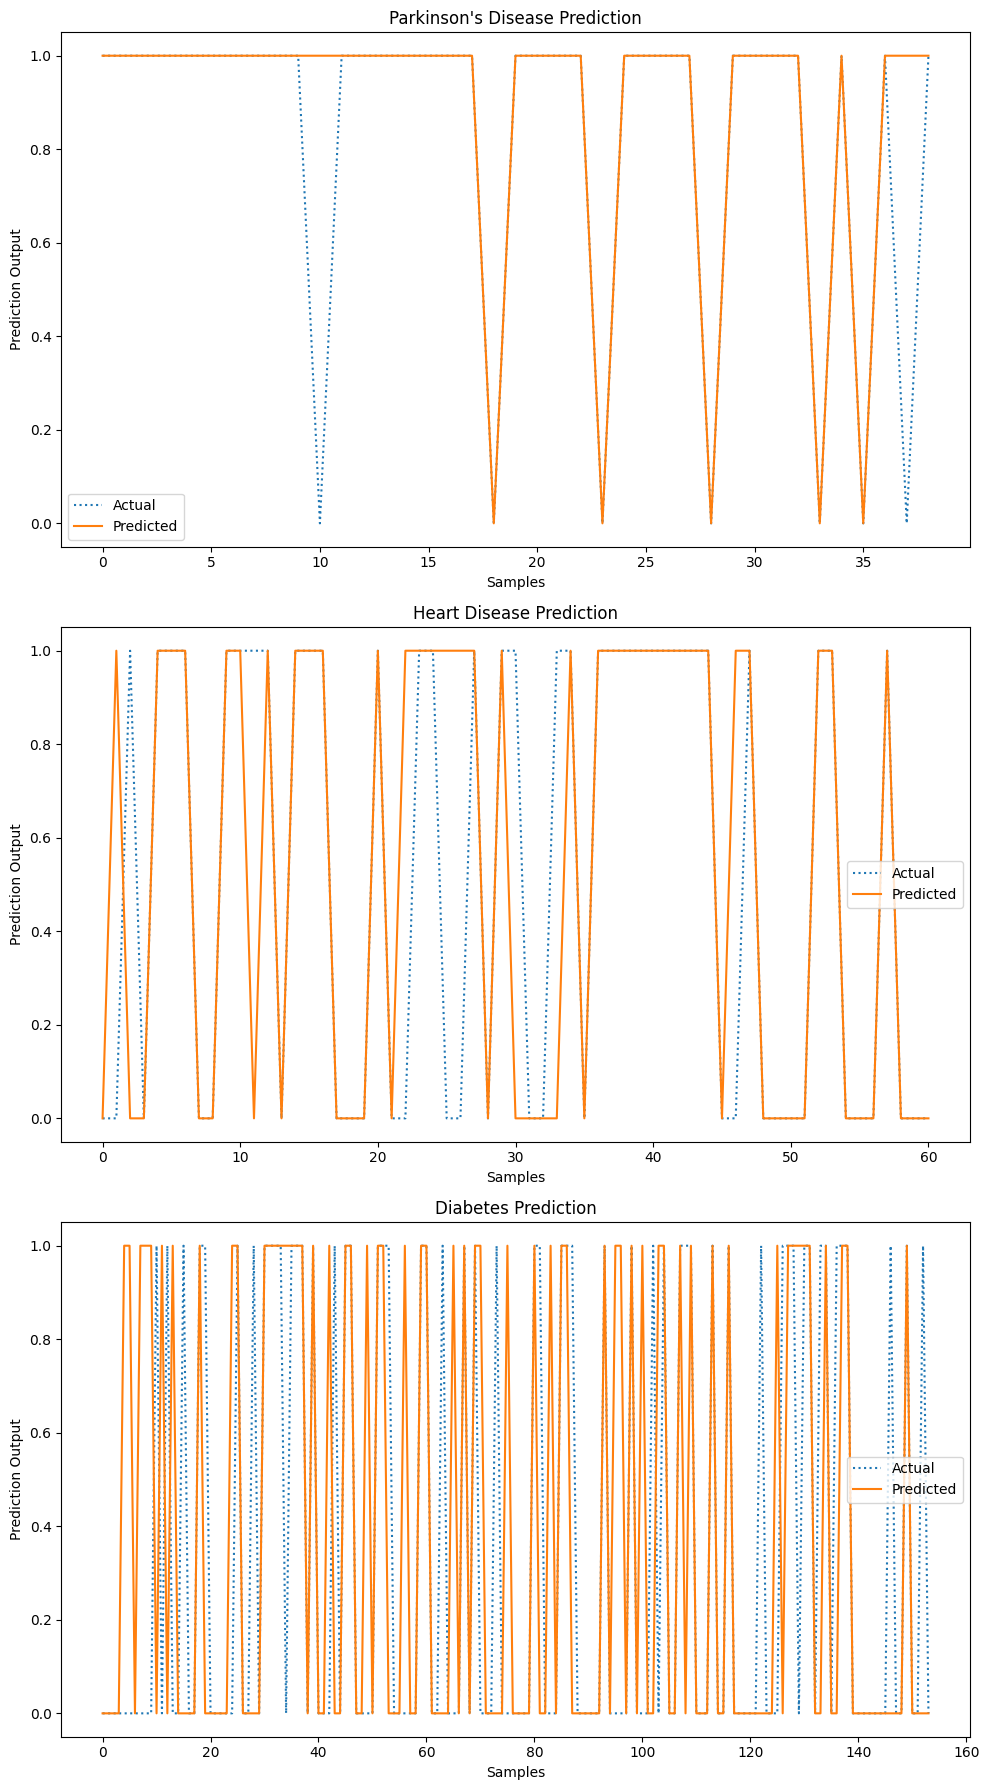

In [21]:
# Linear Graphs for Predictions
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

axes[0].plot(range(len(parkinsons_y_test)), parkinsons_y_test, label="Actual", linestyle='dotted')
axes[0].plot(range(len(parkinsons_y_pred)), parkinsons_y_pred, label="Predicted", linestyle='solid')
axes[0].set_title("Parkinson's Disease Prediction")
axes[0].set_xlabel("Samples")
axes[0].set_ylabel("Prediction Output")
axes[0].legend()

axes[1].plot(range(len(heart_y_test)), heart_y_test, label="Actual", linestyle='dotted')
axes[1].plot(range(len(heart_y_pred)), heart_y_pred, label="Predicted", linestyle='solid')
axes[1].set_title("Heart Disease Prediction")
axes[1].set_xlabel("Samples")
axes[1].set_ylabel("Prediction Output")
axes[1].legend()

axes[2].plot(range(len(diabetes_y_test)), diabetes_y_test, label="Actual", linestyle='dotted')
axes[2].plot(range(len(diabetes_y_pred)), diabetes_y_pred, label="Predicted", linestyle='solid')
axes[2].set_title("Diabetes Prediction")
axes[2].set_xlabel("Samples")
axes[2].set_ylabel("Prediction Output")
axes[2].legend()

plt.tight_layout()
plt.show()